In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/Users/demol/df_totalclean.csv')

In [8]:
df.head(3)

,Unnamed: 0,product_name,nutriscore_score,nutriscore_grade,countries,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,3,moutarde au moût de raisin,18.0,d,France,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.6,1.84
1,12,Tarte noix de coco,14.0,d,France,1594.0,22.0,15.5,27.3,21.9,4.4,4.6,0.1,0.04
2,17,Compote de poire,-2.0,a,France,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.0,0.00


In [9]:
df.drop(['Unnamed: 0', 'nutriscore_score'], axis = 1, inplace=True)

In [10]:
df.head(3)

,product_name,nutriscore_grade,countries,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,moutarde au moût de raisin,d,France,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.6,1.84
1,Tarte noix de coco,d,France,1594.0,22.0,15.5,27.3,21.9,4.4,4.6,0.1,0.04
2,Compote de poire,a,France,657.0,0.0,0.0,36.0,27.0,3.6,0.6,0.0,0.00


To have an impressiond about database contents, I use World cloud package.

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [12]:
fulltext = " ".join(word for word in df.product_name)

In [13]:
print('There are {} words in product description.'.format(len(fulltext)))

There are 8488986 words in product description.


To have an adequate distribution, I delete the common words that make no sense (articles, or common adjectives).

In [14]:
stopwords = set(STOPWORDS)
stopwords.update(["de", "d'", 'à', 'la', 'le', 'les', 'au', 'product', 'Premium', 'Original', 'Classic', 'Mini'])

In [15]:
wordcloud = WordCloud(max_font_size=50, max_words=150, stopwords=stopwords, background_color="white").generate(fulltext)

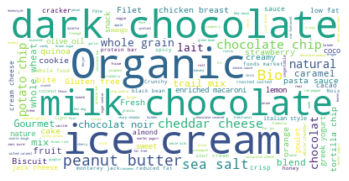

In [16]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see that there are a lot of sweets and organic food!

I count the number of some types of desserts in the "product name" column:

In [76]:
contain_chocolate = df[df['product_name'].str.contains('chocolate')]
contain_Tartes = df[df['product_name'].str.contains('Tarte')]
contain_icecream = df[df['product_name'].str.contains('ice')]
print('There are' , len(contain_Tartes), 'Tartes')
print('There are' , len(contain_chocolate), ' types of Chocolates')
print('There are' , len(contain_icecream), 'types of ice creams')

There are 314 Tartes
There are 10310  types of Chocolates
There are 15995 types of ice creams


Here I want to get the information about different countries in the database:

In [35]:
df['countries'].value_counts()[:9]

United States     148595
France             55573
Deutschland         3025
España              2787
México              2217
United Kingdom      2054
Suisse              1479
Italy               1384
Spain               1260
Name: countries, dtype: int64

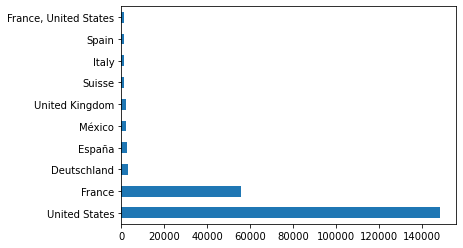

In [36]:
ax = df.countries.value_counts()[:10].plot(kind='barh')

The champions in nutri-score marking are the US and France!

## Analyse bivariée

Here I plot the quantity of fat, proteins, sugars or salt against energy using seaborn package.

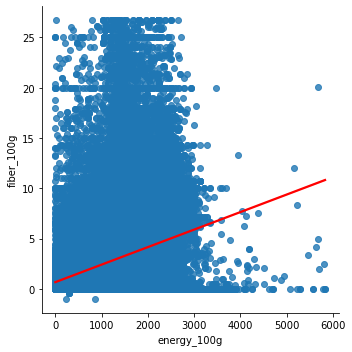

In [40]:
sns.lmplot(x='energy_100g', y='fiber_100g', data=df, line_kws={'color': 'red'})

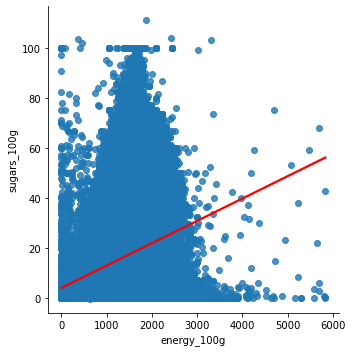

In [269]:
sns.lmplot(x='energy_100g', y='sugars_100g', data=df, line_kws={'color': 'red'})

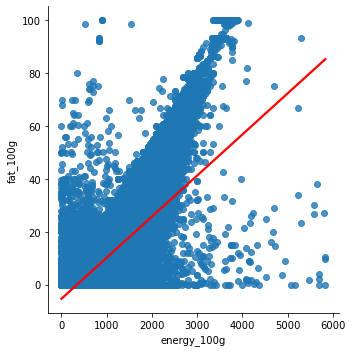

In [267]:
sns.lmplot(x='energy_100g', y='fat_100g', data=df, line_kws={'color': 'red'})

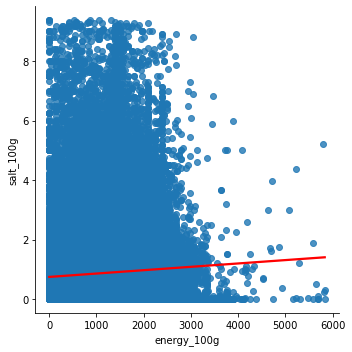

In [270]:
sns.lmplot(x='energy_100g', y='salt_100g', data=df, line_kws={'color': 'red'})

We can see that fat and sugars contribute the most, while salt has no impact on energy

### Which country produces healthier food?

France and the US are the main contributors to nutri-score indexing in the database. Here we can count the amount of each nutri-score product (A, B, etc) produced by a given country.

In [66]:
df_cscore = df[['countries', 'nutriscore_grade']]

In [67]:
df_cscore.head(3)

,countries,nutriscore_grade
0,France,d
1,France,d
2,France,a


In [68]:
df_france = df_cscore.loc[df_cscore['countries'] == 'France']

In [69]:
df_us = df_cscore.loc[df_cscore['countries'] == 'United States']

In [70]:
df_france['nutriscore_grade'].value_counts()

d    13487
c    12583
a    12260
b     9195
e     8048
Name: nutriscore_grade, dtype: int64

In [254]:
df_fr = pd.DataFrame(df_france['nutriscore_grade'].value_counts())

In [255]:
df_fr.sort_index(ascending=True, inplace=True)

For better visualisation, I plot the dataframe using matplotlib pie plot.

array([<AxesSubplot:ylabel='nutriscore_grade'>], dtype=object)

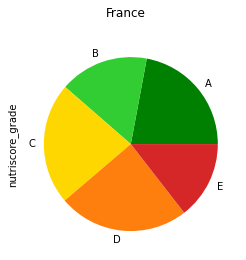

In [262]:
labels = ['A', 'B', 'C', 'D', 'E']
colours = {'A': 'green',
           'B': 'limegreen',
           'C': 'gold',
           'D': 'tab:orange',
            'E': 'tab:red'}

df_fr.plot(kind='pie', title='France', subplots=True, labels=labels, legend=None, colors=[colours[key] for key in labels] )

In [71]:
df_us['nutriscore_grade'].value_counts()

d    47859
c    29388
e    28645
a    25392
b    17311
Name: nutriscore_grade, dtype: int64

In [238]:
df_usa = pd.DataFrame(df_us['nutriscore_grade'].value_counts())

In [265]:
df_usa.sort_index(ascending=True, inplace=True)

array([<AxesSubplot:ylabel='nutriscore_grade'>], dtype=object)

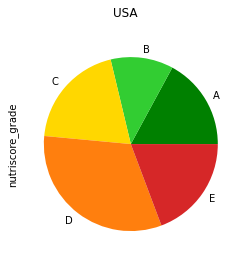

In [266]:
labels = ['A', 'B', 'C', 'D', 'E']
colours = {'A': 'green',
           'B': 'limegreen',
           'C': 'gold',
           'D': 'tab:orange',
            'E': 'tab:red'}
df_usa.plot(kind='pie', title='USA', subplots=True, labels=labels, legend=None, colors=[colours[key] for key in labels] )

Conclusion: France produce healthier food then the US.


### Multivariate analysis

First, I use Principal Component Analysis to see if the impact of all columns is equal or some of them are correlated and thus can be removed.

In [85]:
dfa_full = df[['energy_100g', 'fat_100g', 'proteins_100g', 'carbohydrates_100g', 'sugars_100g', 'sodium_100g']]

In [100]:
dfa = dfa_full.sample(n=10000)

In [101]:
# We are going to learn the importance of 5 features:
X = dfa[['fat_100g', 'proteins_100g', 'carbohydrates_100g', 'sugars_100g', 'sodium_100g']]
y = dfa[['energy_100g']]

In [105]:
y = y.astype(int)

In [108]:
b = np.tile(y.columns, len(y.index))
a = np.repeat(y.index, len(y.columns))
c = y.values.ravel()

In [158]:
c

array([ 222, 1590,  473, ...,  275,  523,  372])

In [160]:
c_norm = np.linalg.norm(c)
c_scaled = c/c_norm

In [162]:
c_scaled

array([0.00159204, 0.01140244, 0.00339205, ..., 0.00197212, 0.00375061,
       0.00266774])

In [91]:
! pip install scikit-learn

In [94]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [102]:
# We normilize the dataset:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [111]:
from sklearn.decomposition import PCA

In [173]:
pca = PCA(n_components=5)

X_pca_scaled = pca.fit_transform(X_scaled)
X_pca_scaled.shape

(10000, 5)

In [174]:
pca.n_components_

5

In [175]:
pca.explained_variance_ratio_

array([0.37535192, 0.25542035, 0.17120784, 0.12853556, 0.06948432])

In [176]:
pca_data = pca.transform(X_scaled)

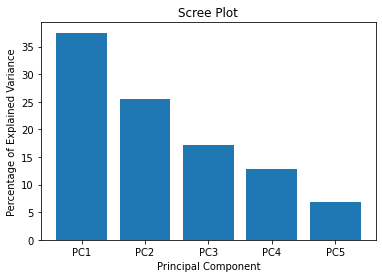

In [221]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1) #calculate the percentage of variance

labels = ['PC' + str(x) for x in range(1, len(per_var)+1) ]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

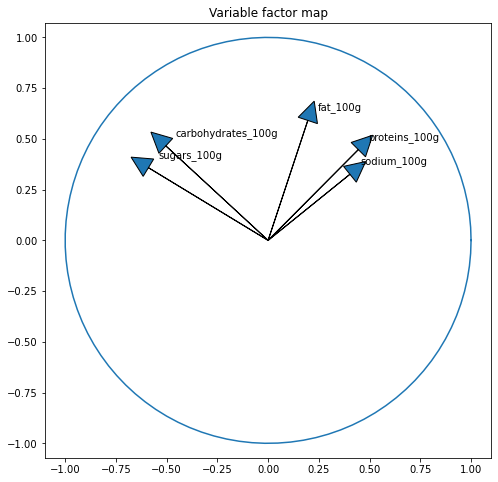

In [146]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],   #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             X.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

### Correlation Matrix

Le coefficient de corrélation de Pearson est une mesure de la corrélation linéaire entre deux ensembles de données. 
Le coefficient de corrélation est compris entre -1 et 1. Une valeur absolue de 1 exactement implique qu'une équation linéaire décrit parfaitement la relation entre X et Y, tous les points de données étant situés sur une ligne. Le signe de la corrélation est déterminé par la pente de régression : une valeur de +1 implique que tous les points de données se trouvent sur une ligne pour laquelle Y augmente lorsque X augmente, et vice versa pour -1. Une valeur de 0 implique qu'il n'y a pas de dépendance linéaire entre les variables.

In [215]:
#f = plt.figure(figsize=(12, 8))
corr = dfa_full.corr(method = 'pearson')
#plt.matshow(corr, method = 'pearson', fignum=f.number)
#corr.style.background_gradient(cmap='coolwarm')
#plt.show()
print(corr)

                    energy_100g  fat_100g  proteins_100g  carbohydrates_100g  \
energy_100g            1.000000  0.728501      -0.131025            0.388855   
fat_100g               0.728501  1.000000       0.277225           -0.328175   
proteins_100g         -0.131025  0.277225       1.000000           -0.722243   
carbohydrates_100g     0.388855 -0.328175      -0.722243            1.000000   
sugars_100g            0.274337 -0.280174      -0.846042            0.851604   
sodium_100g           -0.536500 -0.058991       0.469711           -0.697092   

                    sugars_100g  sodium_100g  
energy_100g            0.274337    -0.536500  
fat_100g              -0.280174    -0.058991  
proteins_100g         -0.846042     0.469711  
carbohydrates_100g     0.851604    -0.697092  
sugars_100g            1.000000    -0.807853  
sodium_100g           -0.807853     1.000000  


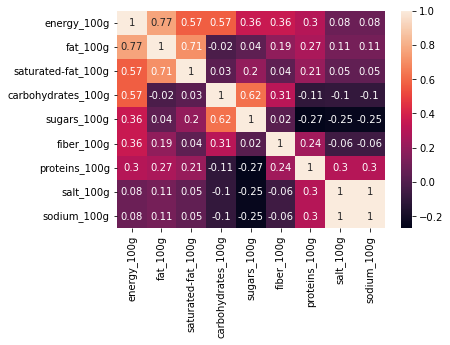

In [216]:
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [151]:
df_ice = contain_icecream = df[df['product_name'].str.contains('ice cream')]

In [152]:
df_ice.head()

,product_name,nutriscore_grade,countries,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
51,"Lactaid, ice cream, vanilla",d,United States,883.0,11.27,7.04,22.54,16.90,0.0,2.82,0.1400,0.05600
52,Natural ice cream,d,United States,941.0,11.27,7.04,26.76,18.31,0.0,4.23,0.1225,0.04900
53,"Lactaid, ice cream, butter pecan",d,United States,1000.0,15.49,7.04,22.54,15.49,1.4,4.23,0.3350,0.13400
1294,Classic country vanilla ice cream,d,United States,945.0,12.90,7.53,23.66,18.28,0.0,4.30,0.1639,0.06556
1295,"Private selection, ice cream, denali extreme m...",d,United States,1230.0,16.47,8.24,32.94,27.06,2.4,4.71,0.2200,0.08800


In [153]:
df_ice.shape

(2736, 12)

In [181]:
df_ice['nutriscore_grade'].value_counts()

d    1985
c     395
e     161
a     129
b      66
Name: nutriscore_grade, dtype: int64

In [194]:
chart = pd.DataFrame(df_ice['nutriscore_grade'].value_counts())

<AxesSubplot:>

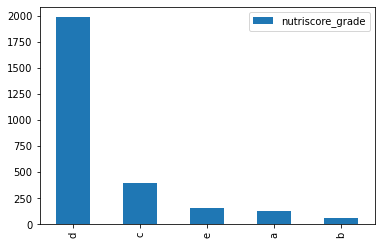

In [201]:
chart.plot(kind='bar')

In [202]:
#my_colors = ['r', 'b','y','b','g']
#df_ice['nutriscore_grade'].value_counts().plot(kind='bahr', color=['black', 'red', 'green', 'blue', 'cyan'])

In [182]:
#df1 = df[(df['category'] == 'A') & (df['value'].between(10,20))]

df_sugar_free = df_ice[(df_ice['sugars_100g'] == 0)]

In [183]:
df_sugar_free.head()

,product_name,nutriscore_grade,countries,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
4436,"Roundy's, ice cream cups",c,United States,1858.0,0.0,0.0,88.89,0.0,0.0,0.0,0.2775,0.111
30605,"Food lion, classic ice cream cone",c,United States,1858.0,0.0,0.0,88.89,0.0,0.0,0.0,0.2775,0.111
41513,Classic ice cream cones,c,United States,1858.0,0.0,0.0,88.89,0.0,0.0,0.0,0.2775,0.111
41572,"Hannaford, classic ice cream cones",c,United States,1858.0,0.0,0.0,88.89,0.0,0.0,0.0,0.2775,0.111
42951,Jumbo ice cream cups,b,United States,1569.0,0.0,0.0,87.50,0.0,0.0,12.5,0.3125,0.125


In [187]:
df_sugar_free.shape

(8, 12)

In [184]:
df_sugar_free.describe

<bound method NDFrame.describe of                                  product_name nutriscore_grade      countries  \
4436                 Roundy's, ice cream cups                c  United States   
30605       Food lion, classic ice cream cone                c  United States   
41513                 Classic ice cream cones                c  United States   
41572      Hannaford, classic ice cream cones                c  United States   
42951                    Jumbo ice cream cups                b  United States   
71779                     Joy, ice cream cups                c  United States   
78200  Bourbon vanilla bean truffle ice cream                d  United States   
96411               Smooth & creamy ice cream                c  United States   

       energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
4436        1858.0      0.00                0.00               88.89   
30605       1858.0      0.00                0.00               88.89   
41513       1858.0  

In [185]:
df_proteins = df_sugar_free[(df_sugar_free['proteins_100g'] != 0)]

In [186]:
df_proteins.head()

,product_name,nutriscore_grade,countries,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
42951,Jumbo ice cream cups,b,United States,1569.0,0.00,0.00,87.50,0.0,0.0,12.50,0.3125,0.125
78200,Bourbon vanilla bean truffle ice cream,d,United States,1425.0,20.00,12.00,36.00,0.0,0.0,4.00,0.2000,0.080
96411,Smooth & creamy ice cream,c,United States,636.0,9.09,9.09,18.18,0.0,4.5,1.52,0.0750,0.030
